In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("Actual & Forecast - 2025-09-23T082057.404.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df.head()

,Date,DayOfWeek,Avail,Total,Indv,Multi,Blocks,Occ,Ad,Ch,...,CumulativeGrandTotal,ARR,APR,Yield,Blked,ROOS,DFS,Waitlist,InStock,RatePlanRevenue
0,2023-01-01,Sunday,15.0,89,75,14,0,83.18,173,1,...,13853.48,140.15,141.66,116.57,0,3,0,0,107,12607.44
1,2023-01-02,Monday,22.0,83,69,14,0,77.57,149,7,...,24350.60,106.40,111.40,82.54,0,2,0,0,107,9246.57
2,2023-01-03,Tuesday,19.0,84,73,11,0,78.50,145,5,...,33474.71,94.39,96.63,74.10,0,4,0,0,107,8116.61
3,2023-01-04,Wednesday,18.0,87,73,14,0,81.31,150,4,...,42329.74,88.76,93.21,72.17,0,2,0,0,107,8109.58
4,2023-01-05,Thursday,18.0,87,71,16,0,81.31,160,2,...,52087.01,97.20,98.84,79.03,0,2,0,0,107,8598.97


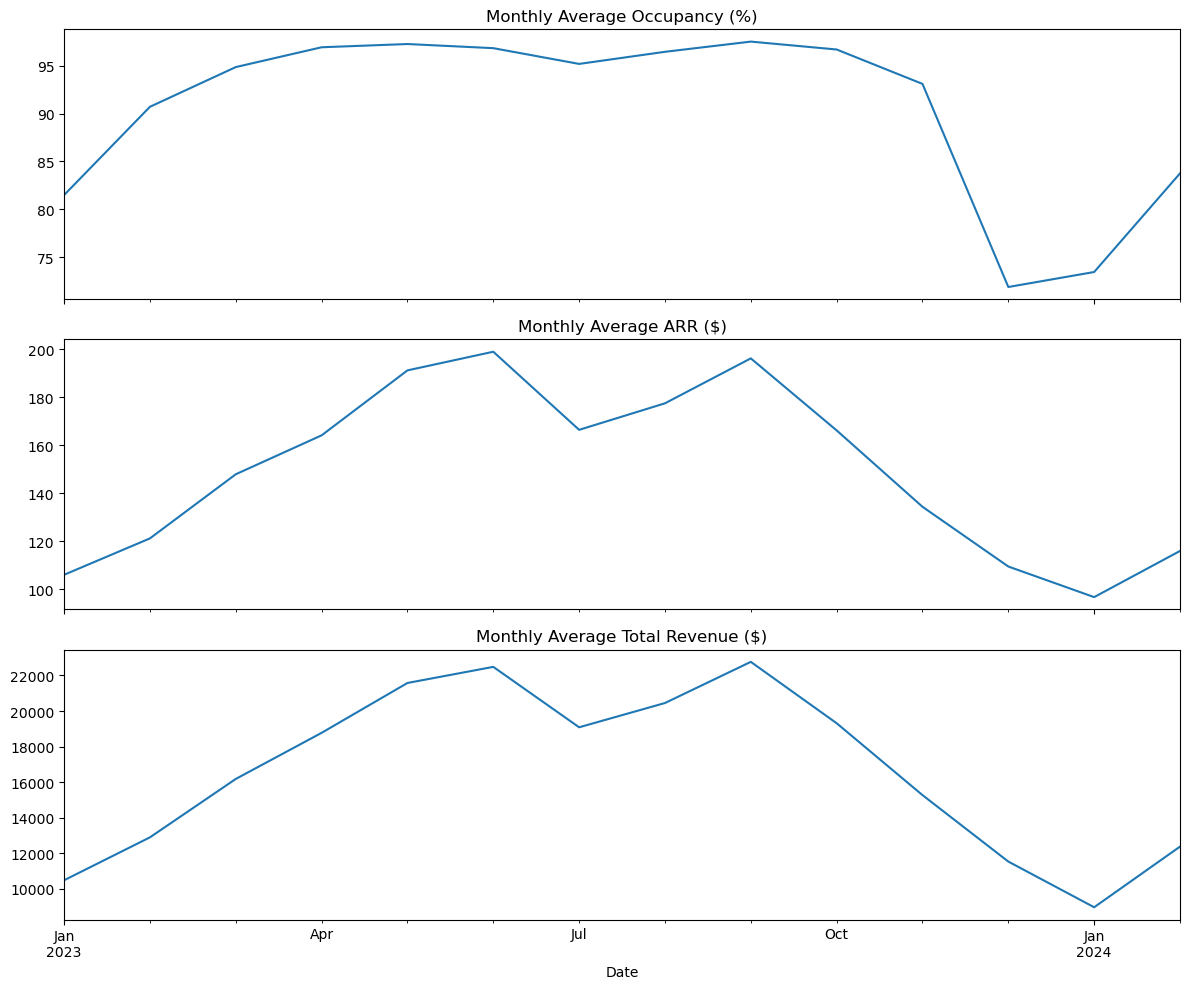

In [2]:
# Time series line plots (Occupancy, ARR, Revenue)
monthly = df.set_index("Date").resample("ME")[["Occ","ARR","TotalRevenue"]].mean()

fig, axes = plt.subplots(3, 1, figsize=(12,10), sharex=True)
monthly["Occ"].plot(ax=axes[0])
axes[0].set_title("Monthly Average Occupancy (%)")

monthly["ARR"].plot(ax=axes[1])
axes[1].set_title("Monthly Average ARR ($)")

monthly["TotalRevenue"].plot(ax=axes[2])
axes[2].set_title("Monthly Average Total Revenue ($)")
plt.tight_layout()
plt.show()

Seasonal dips in winter months across occupancy, ARR, and revenue

          Date DayOfWeek     Occ     ARR  TotalRevenue
75  2023-03-17    Friday   99.07  321.09      35605.93
76  2023-03-18  Saturday   98.13  318.40      34799.07
118 2023-04-29  Saturday   98.13  265.20      30272.78
124 2023-05-05    Friday   95.33  272.26      29523.47
138 2023-05-19    Friday   99.07  284.45      32167.83
139 2023-05-20  Saturday   99.07  298.32      32899.22
146 2023-05-27  Saturday  100.00  261.08      30079.23
160 2023-06-10  Saturday   98.13  275.81      31491.10
174 2023-06-24  Saturday   96.26  290.12      31587.67
236 2023-08-25    Friday   99.07  279.75      31871.13
237 2023-08-26  Saturday   98.13  293.01      32979.32
251 2023-09-09  Saturday   99.07  279.29      32321.13
300 2023-10-28  Saturday   99.07  262.77      30107.59


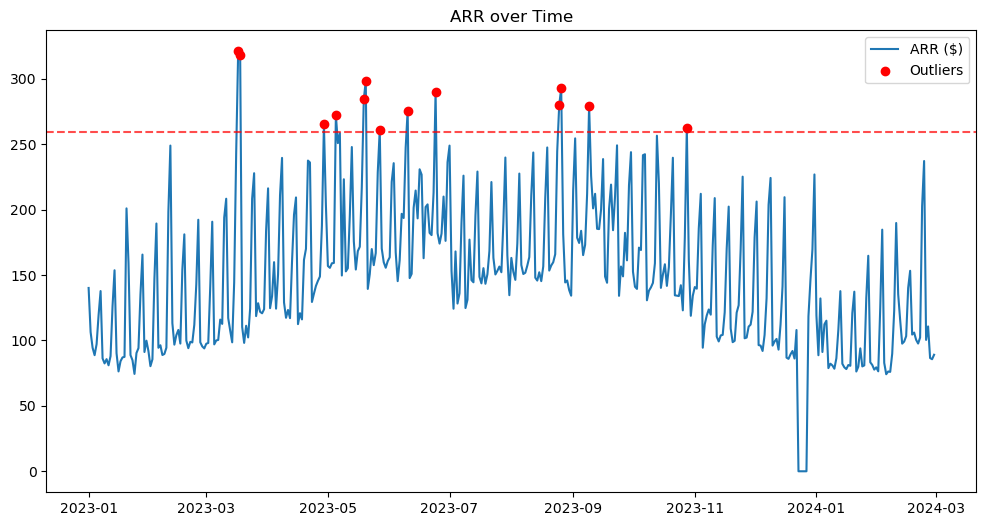

In [3]:
# Identify outliers
arr_threshold = df["ARR"].mean() + 2*df["ARR"].std()
rev_threshold = df["TotalRevenue"].mean() + 2*df["TotalRevenue"].std()
outliers = df[(df["ARR"] > arr_threshold) | (df["TotalRevenue"] > rev_threshold)]
print(outliers[["Date","DayOfWeek","Occ","ARR","TotalRevenue"]])

# Plot ARR with outliers
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["ARR"], label="ARR ($)")
plt.scatter(outliers["Date"], outliers["ARR"], color="red", label="Outliers", zorder=5)
plt.axhline(arr_threshold, color="red", linestyle="--", alpha=0.7)
plt.title("ARR over Time")
plt.legend()
plt.show()

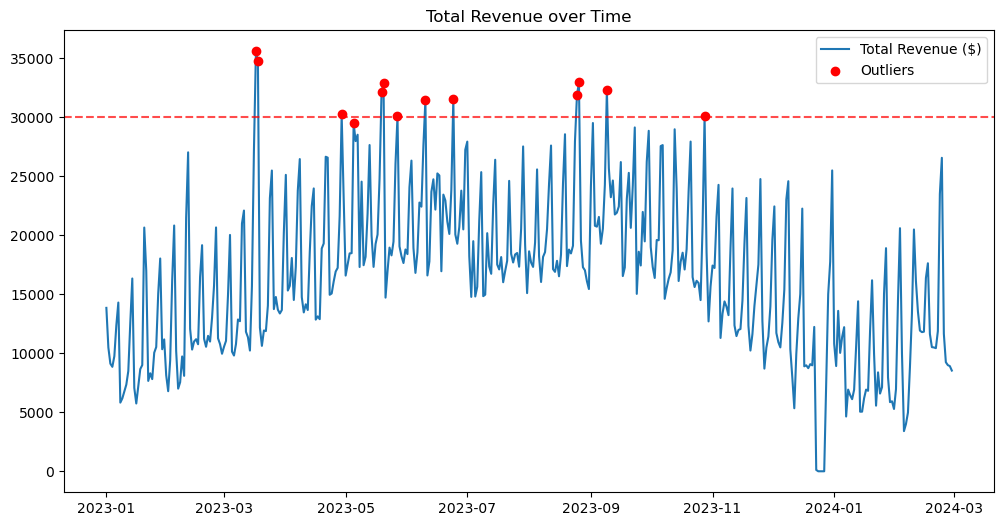

In [4]:
# Plot Total Revenue with outliers
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["TotalRevenue"], label="Total Revenue ($)")
plt.scatter(outliers["Date"], outliers["TotalRevenue"], color="red", label="Outliers", zorder=5)
plt.axhline(rev_threshold, color="red", linestyle="--", alpha=0.7)
plt.title("Total Revenue over Time")
plt.legend()
plt.show()

Outlier spikes are likely due to event-driven demand shocks -- more research needed

All outliers fall on Fridays & Saturdays.

Occupancy was nearly all at 95–100% showing issues with underpricing

Dynamic rate ceiling could be set higher ( > 300)

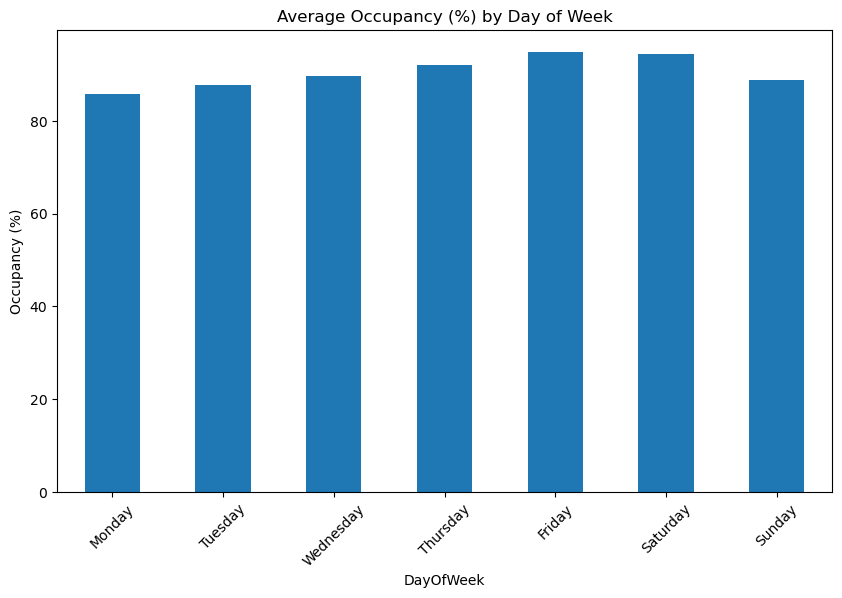

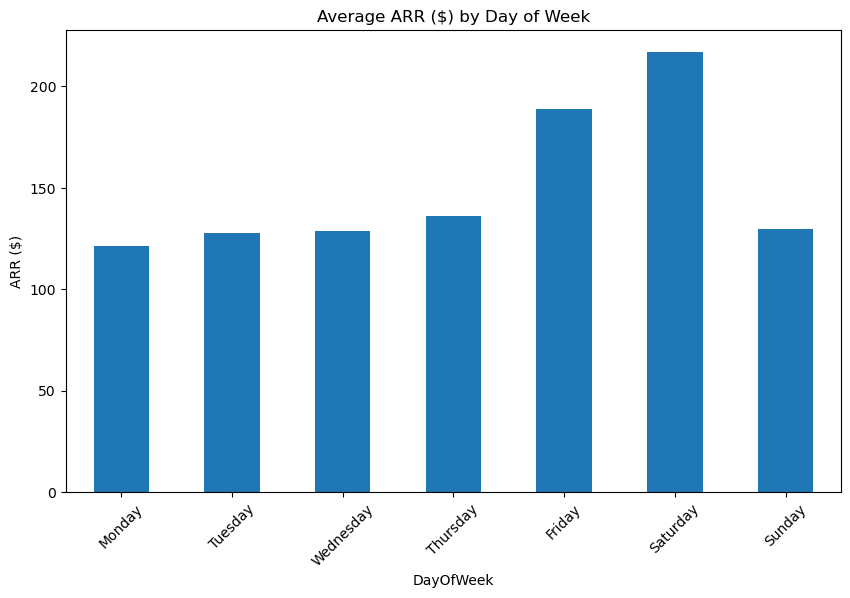

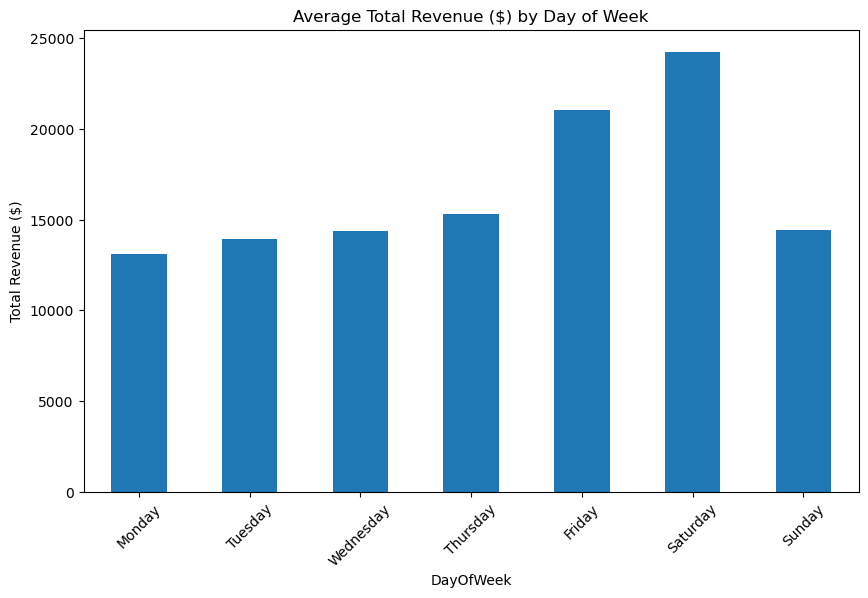

In [5]:
# Day of Week Analysis
dow = df.groupby("DayOfWeek")[["Occ","ARR","TotalRevenue"]].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

# Occupancy barplot
plt.figure(figsize=(10,6))
dow["Occ"].plot(kind="bar")
plt.title("Average Occupancy (%) by Day of Week")
plt.ylabel("Occupancy (%)")
plt.xticks(rotation=45)
plt.show()

# ARR barplot
plt.figure(figsize=(10,6))
dow["ARR"].plot(kind="bar")
plt.title("Average ARR ($) by Day of Week")
plt.ylabel("ARR ($)")
plt.xticks(rotation=45)
plt.show()

# Revenue barplot
plt.figure(figsize=(10,6))
dow["TotalRevenue"].plot(kind="bar")
plt.title("Average Total Revenue ($) by Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

Occupancy is stable throughout the week, meaning pricing strategy should focus on maximizing rate rather than filling rooms

ARR and Revenue peaks on Friday & Saturday -- guests are less price sensitive

Weekday pricing -- Occupancy is high but ARR is low, showing underpriced midweek business demand

Slightly softer demand on Monday and Sunday